### 项目介绍：

本项目的数据来源是北美一家电信公司。客户流失是现代企业面临最困难的问题，而对客户流失进行预测是电信业保留现有客户的最有效策略之一。我们的任务是根据已有的数据信息，进行分析，并且建立机器学习模型，去预测哪些客户会流失，并且分析得出是什么原因与客户是否流失有较强的关联。

### 目录
#### Part 1: Exploratory Analysis and Extract Insights
· Check the data format

· Do oridinal encoding for all the categorical variables

· Do one-hot encoding

· Remove uncessary columns from the data

· Use oversampling method to balance the data

· Plot the correlation plot
#### Part 2: Fitting Models
· Normalize the data

· Train test slit

· Fit a basic model

· Fit multiple models, and do model selection

-----------------------------------------------------------

### Part 1: Exploratory Analysis and Extract Insights

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [35]:
df=pd.read_csv('Data_Science_Challenge.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [239]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000



#### Do oridinal encoding for all the categorical variables

In [131]:
oe =OrdinalEncoder()
df_oe = pd.DataFrame(oe.fit_transform(df))
df_oe.columns = df.columns
df_oe

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16.0,126.0,1.0,1926.0,0.0,1.0,19.0,1491.0,70.0,1491.0,767.0,60.0,684.0,1184.0,49.0,657.0,79.0,3.0,79.0,1.0,0.0
1,35.0,105.0,1.0,1575.0,0.0,1.0,20.0,667.0,83.0,667.0,748.0,64.0,668.0,1265.0,61.0,701.0,116.0,3.0,116.0,1.0,0.0
2,31.0,135.0,1.0,1117.0,0.0,0.0,0.0,1362.0,74.0,1362.0,158.0,71.0,150.0,443.0,62.0,292.0,101.0,5.0,101.0,0.0,0.0
3,35.0,82.0,0.0,1707.0,1.0,0.0,0.0,1625.0,31.0,1625.0,13.0,49.0,13.0,758.0,47.0,445.0,45.0,7.0,45.0,2.0,0.0
4,36.0,73.0,1.0,110.0,1.0,0.0,0.0,711.0,73.0,711.0,330.0,83.0,307.0,664.0,79.0,401.0,80.0,3.0,80.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3.0,189.0,1.0,3057.0,0.0,1.0,30.0,618.0,37.0,618.0,934.0,87.0,829.0,1433.0,41.0,801.0,78.0,6.0,78.0,2.0,0.0
3329,49.0,66.0,1.0,1528.0,0.0,0.0,0.0,1269.0,17.0,1269.0,375.0,16.0,349.0,705.0,81.0,420.0,75.0,4.0,75.0,3.0,0.0
3330,39.0,26.0,2.0,42.0,0.0,0.0,0.0,833.0,69.0,833.0,1489.0,19.0,1322.0,711.0,49.0,423.0,120.0,6.0,120.0,2.0,0.0
3331,6.0,182.0,2.0,1331.0,1.0,0.0,0.0,1123.0,65.0,1123.0,427.0,45.0,394.0,266.0,95.0,191.0,29.0,10.0,29.0,2.0,0.0



#### Check which variables should be do one-hot encoding.

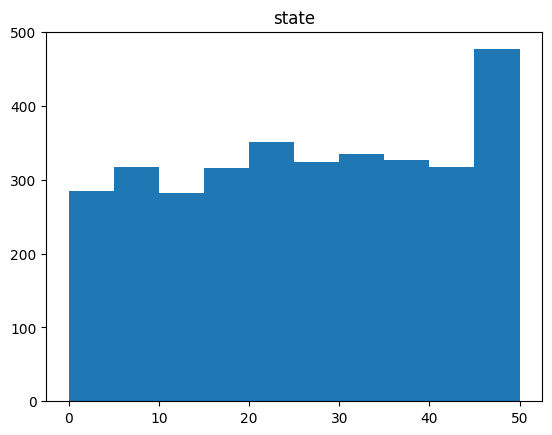

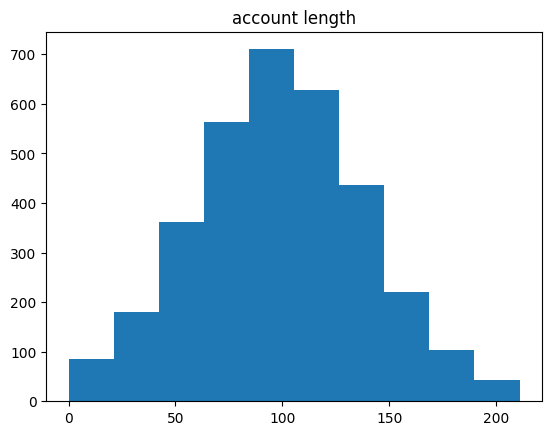

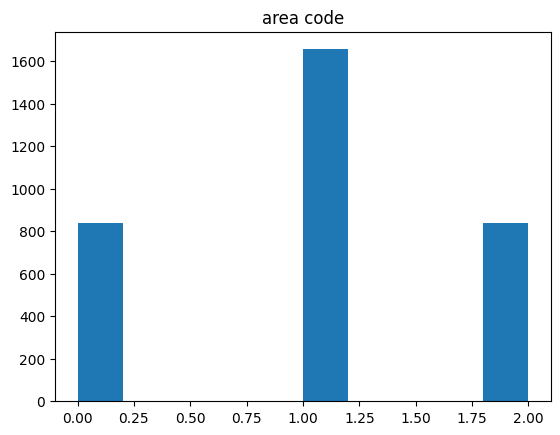

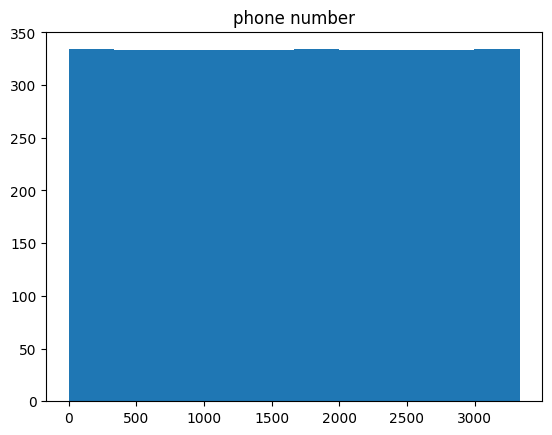

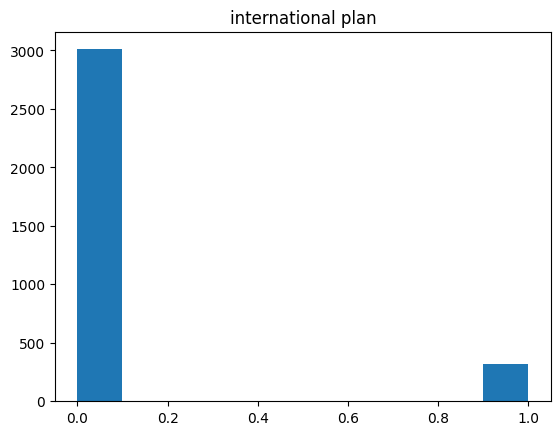

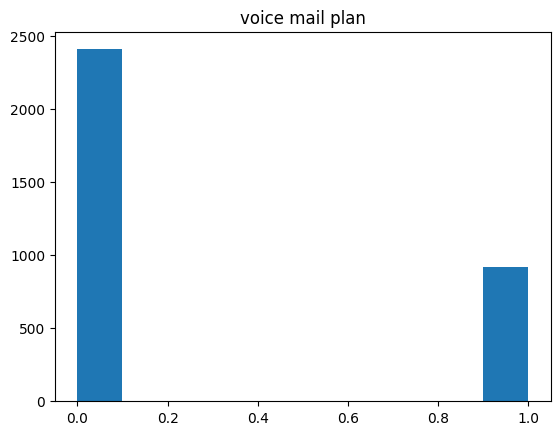

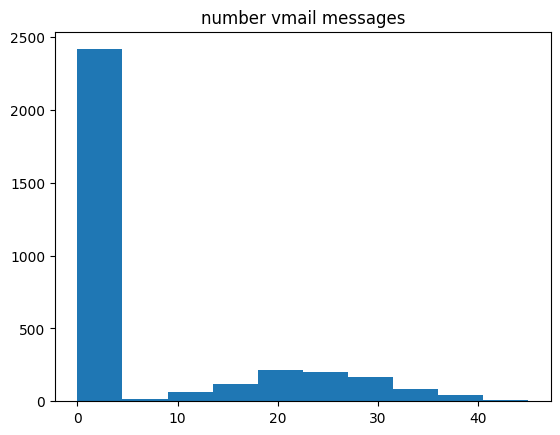

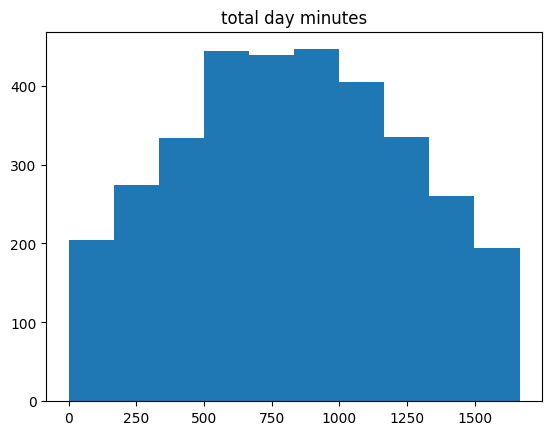

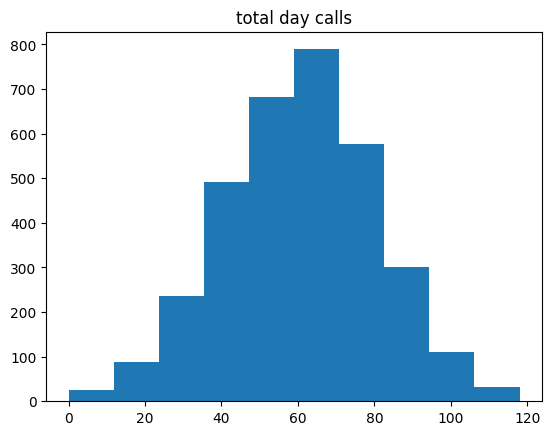

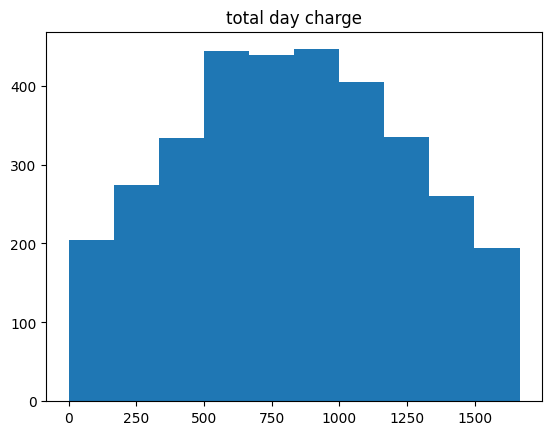

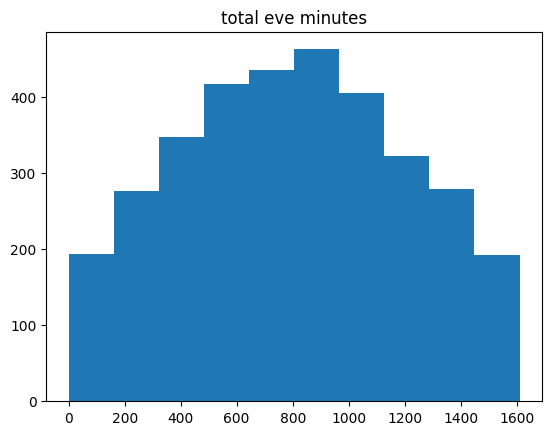

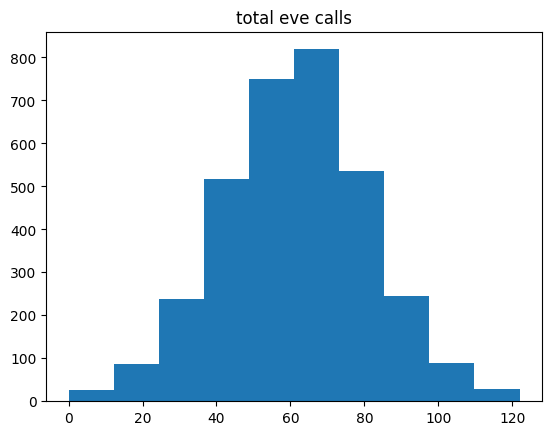

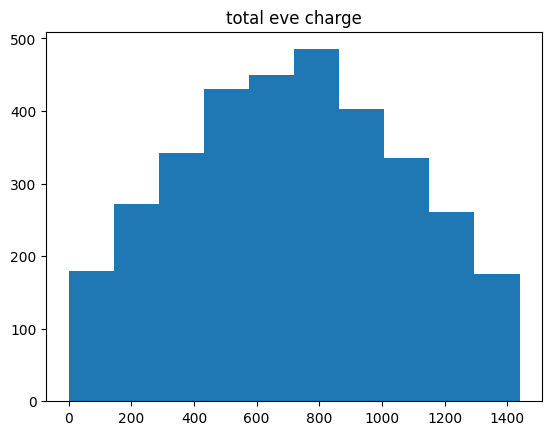

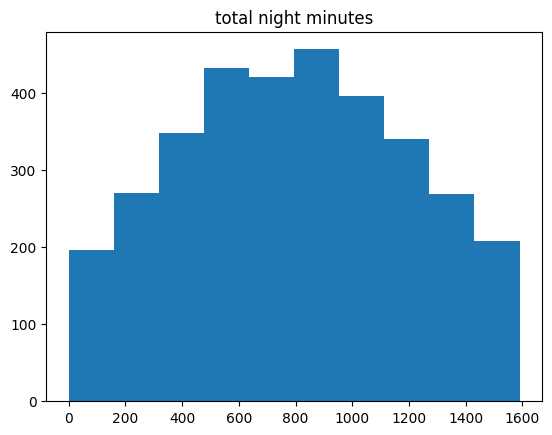

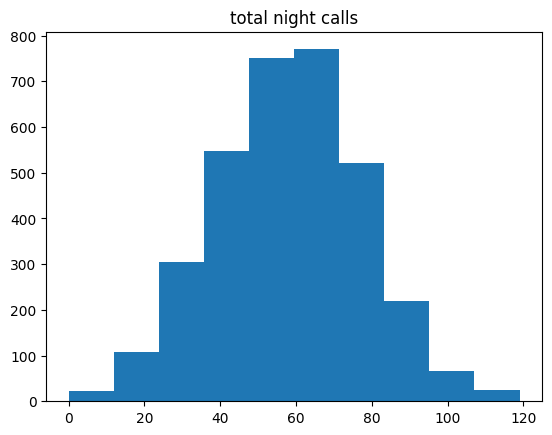

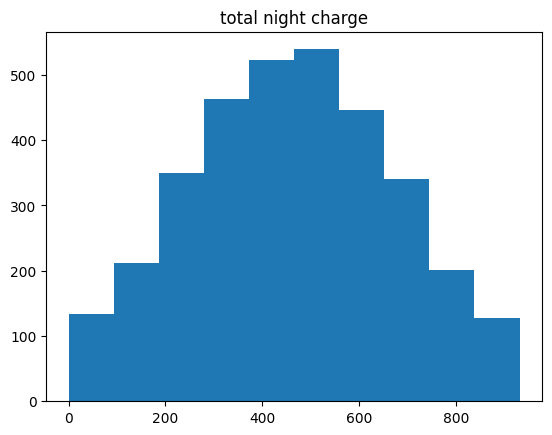

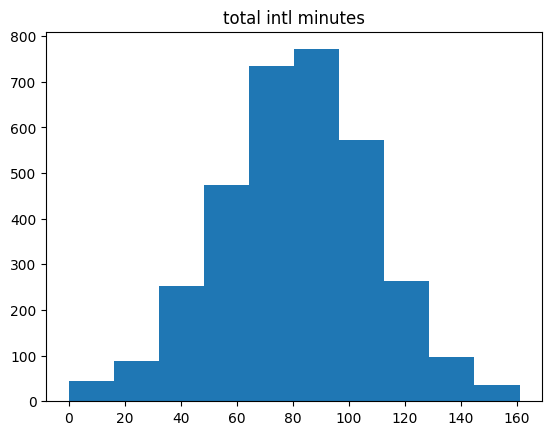

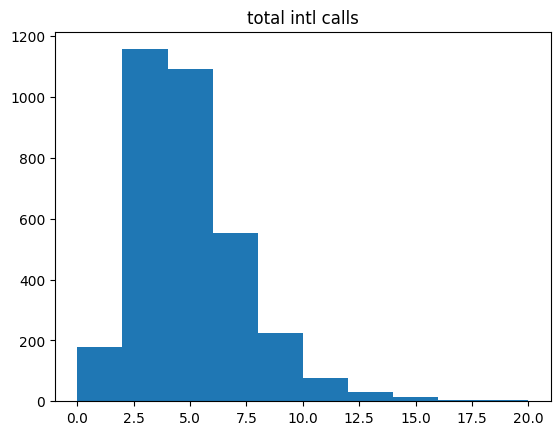

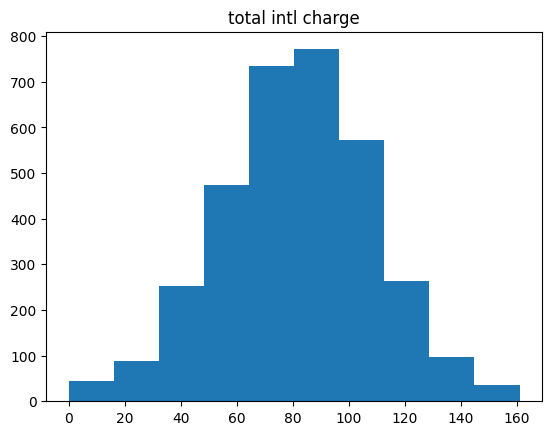

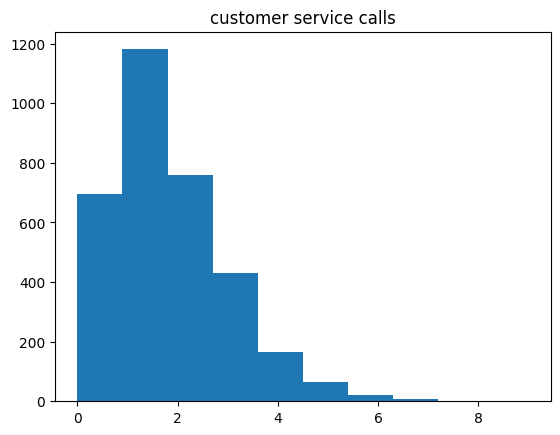

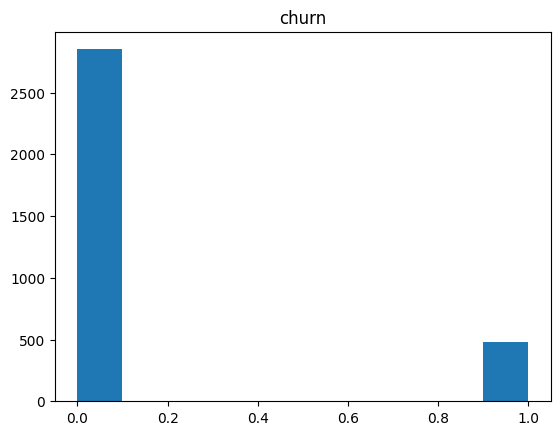

In [23]:
plt.rcdefaults()
for col in df_oe.columns:
    plt.title(col)
    plt.hist(df_oe[col])
    plt.show()
    #print(df_oe[col].value_counts().sort_index())

 Based on the histograms abovem there are three variables should be done one-hot encoding.

In [96]:
df_oh = pd.get_dummies(
    data=df_oe,
    columns=['area code','international plan','voice mail plan'],
    prefix=["AC-", "IP-","VP-"])

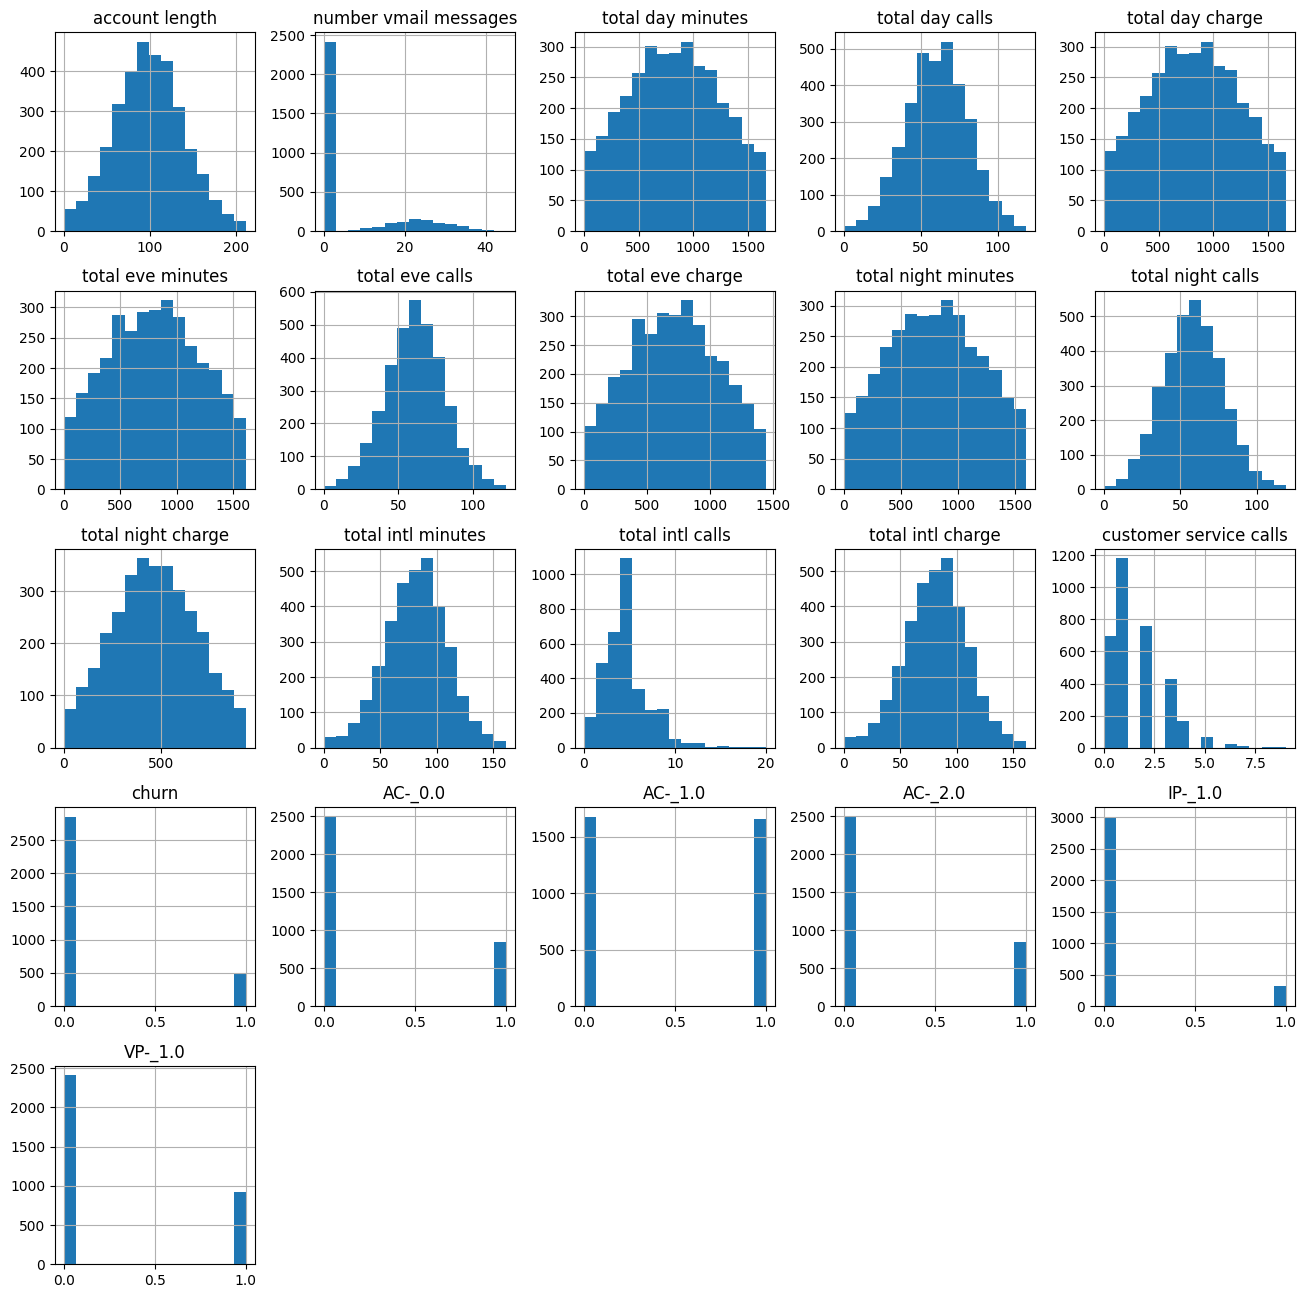

In [107]:
import matplotlib.pyplot as plt

# check distribution of values
df_oh.hist(figsize=(16,16),bins = 15)
plt.show()

Phone number does not really help with the predicting the churn, therefore, we will remove that column from data. 

For the variabel State, it has too many levels, if we keep this variable and turn it into dummy variable, it will be too many new columns for the data set,therefore , this variable will also be removed from the dataset.

For the columns from one_hot encoing, we will remove IP-0.0 and VP-0.0 given they provide same information with IP-1.0 and VP-1.0

In [99]:
df_oh=df_oh.drop(columns=['phone number','state','IP-_0.0',  'VP-_0.0'])
df_oh.shape

(3333, 21)

#### Check whether there are null values in each variable

In [100]:
df_oh.isnull().sum()

account length            0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
AC-_0.0                   0
AC-_1.0                   0
AC-_2.0                   0
IP-_1.0                   0
VP-_1.0                   0
dtype: int64


#### Check whether the predict variable is balanced or not. If it is not balanced, we will use resampling method to balance the data

0.0    2850
1.0     483
Name: churn, dtype: int64


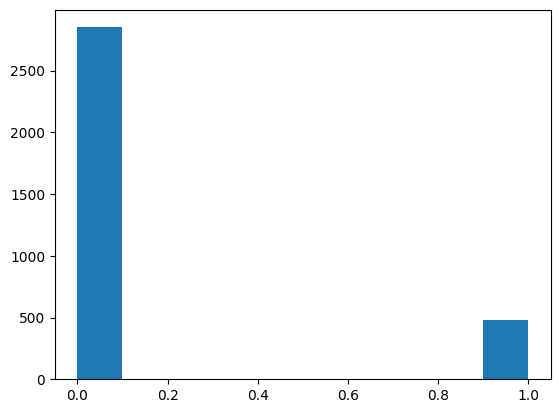

In [101]:
plt.hist(df_oh['churn'])
print(df_oh['churn'].value_counts())

#### Based on the Histogram above, the predicted variable is imbalanced.
#### We will do a over sampling to make sure the data set is balanced.

In [102]:
from imblearn.over_sampling import RandomOverSampler

In [103]:
x=df_oh.drop(columns='churn')
y=df_oh['churn']

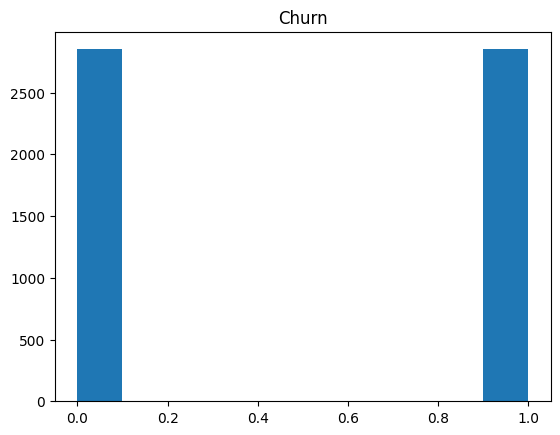

In [115]:
ros=RandomOverSampler()
x_ros,y_ros=ros.fit_resample(x,y)
plt.rcdefaults()
plt.title('Churn')
plt.hist(y_ros)
plt.show()

#### Now the dataset is balanced.


#### Plot the correlation plot.


In [116]:
df_final=pd.concat([x_ros, pd.DataFrame(y_ros)],axis=1)
df_final

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,AC-_0.0,AC-_1.0,AC-_2.0,IP-_1.0,VP-_1.0,churn
0,126.0,19.0,1491.0,70.0,1491.0,767.0,60.0,684.0,1184.0,49.0,657.0,79.0,3.0,79.0,1.0,0,1,0,0,1,0.0
1,105.0,20.0,667.0,83.0,667.0,748.0,64.0,668.0,1265.0,61.0,701.0,116.0,3.0,116.0,1.0,0,1,0,0,1,0.0
2,135.0,0.0,1362.0,74.0,1362.0,158.0,71.0,150.0,443.0,62.0,292.0,101.0,5.0,101.0,0.0,0,1,0,0,0,0.0
3,82.0,0.0,1625.0,31.0,1625.0,13.0,49.0,13.0,758.0,47.0,445.0,45.0,7.0,45.0,2.0,1,0,0,1,0,0.0
4,73.0,0.0,711.0,73.0,711.0,330.0,83.0,307.0,664.0,79.0,401.0,80.0,3.0,80.0,3.0,0,1,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,60.0,0.0,1649.0,65.0,1649.0,1359.0,83.0,1200.0,606.0,30.0,372.0,94.0,2.0,94.0,4.0,1,0,0,0,0,1.0
5696,51.0,0.0,1250.0,77.0,1250.0,219.0,84.0,207.0,1031.0,82.0,579.0,80.0,2.0,80.0,9.0,1,0,0,0,0,1.0
5697,103.0,0.0,1543.0,57.0,1543.0,1495.0,67.0,1327.0,1380.0,84.0,764.0,37.0,3.0,37.0,2.0,0,1,0,0,0,1.0
5698,115.0,0.0,36.0,60.0,36.0,1538.0,45.0,1369.0,529.0,42.0,333.0,65.0,2.0,65.0,1.0,0,0,1,1,0,1.0


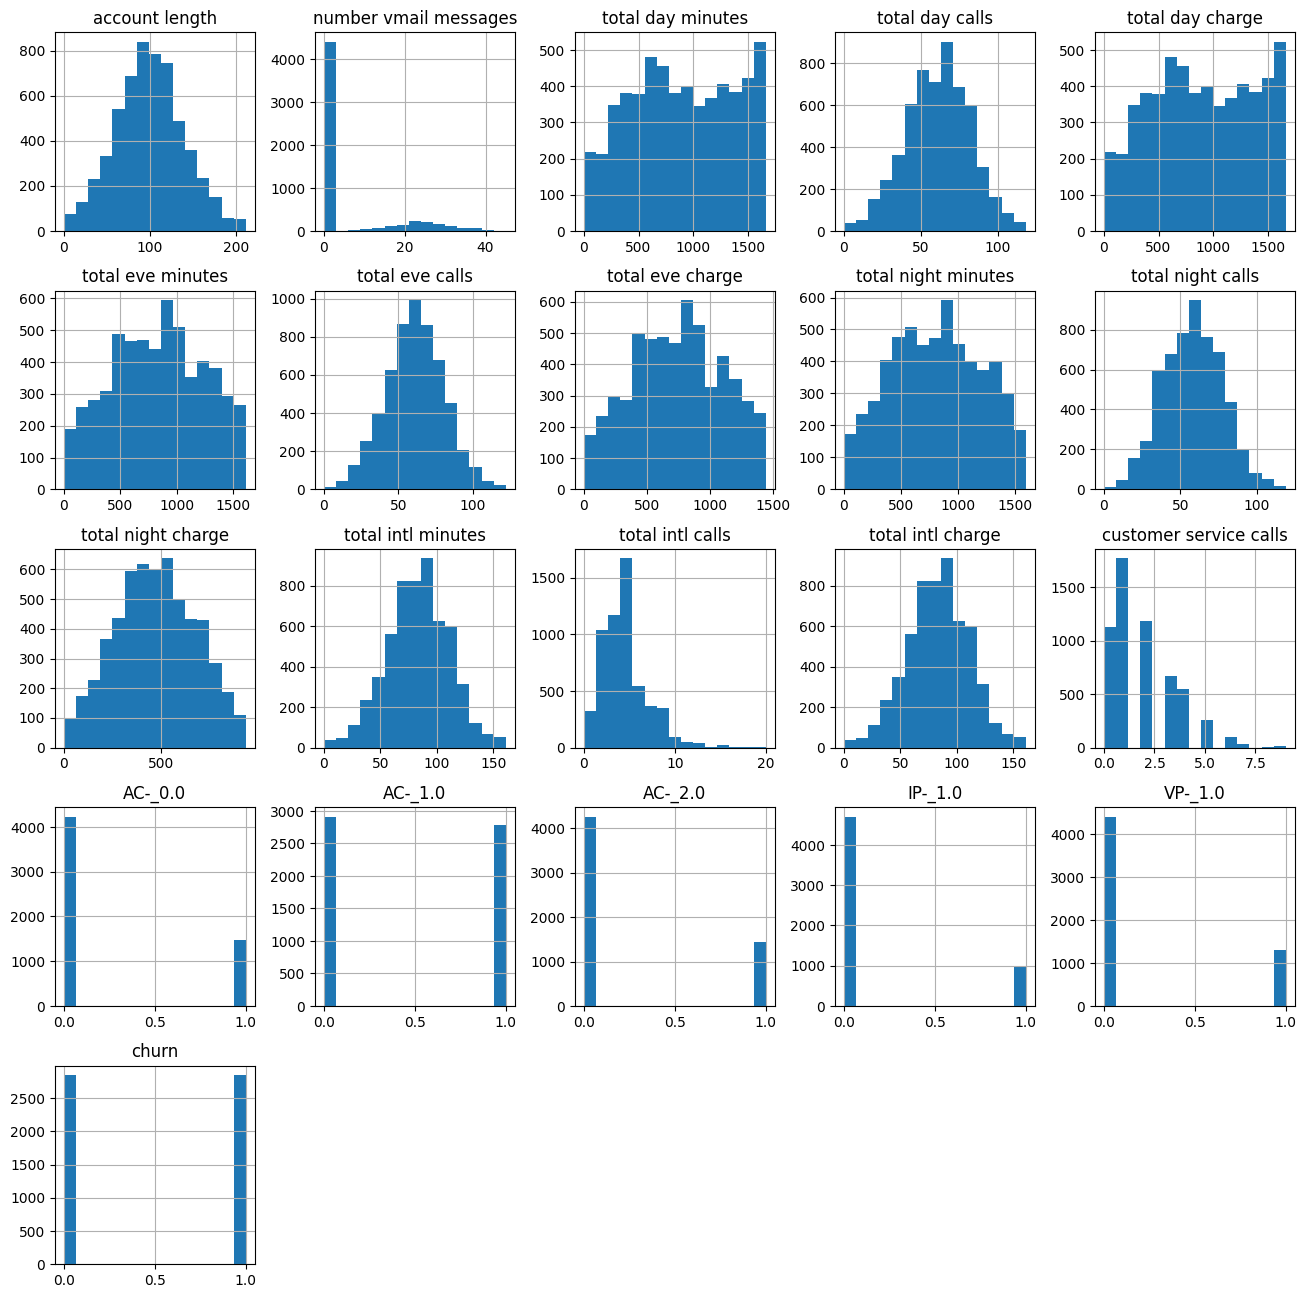

In [129]:
#import matplotlib.pyplot as plt

# check distribution of values
df_final.hist(figsize=(16,16),bins = 15)
plt.show()

<AxesSubplot:>

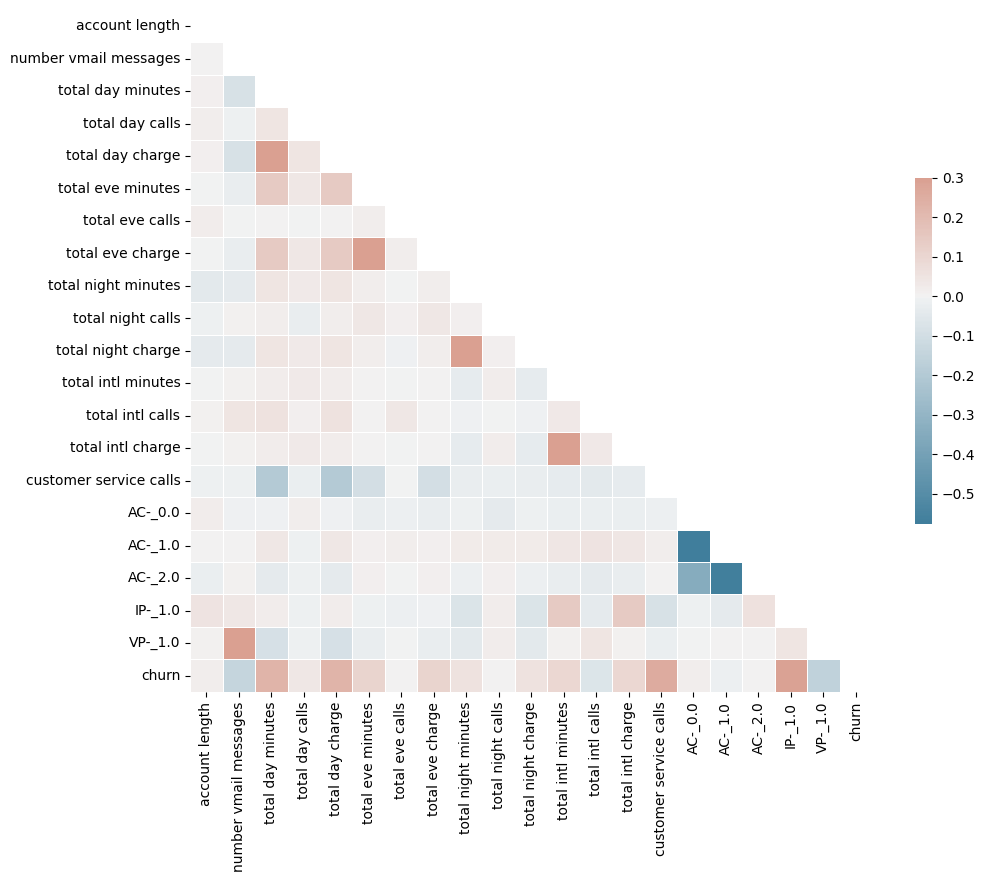

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate a mask for the upper triangle
corr = df_final.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Conclustions from the heatmap above:
1. 语音留言，总的国际通话时间，以及是否有语音留言计划，与客户是否会流失有着负相关性。
2. 日通话时间，日支出，拨打客服次数，以及是否有国际通话计划，与客户是否流失有着正相关性。

### Part 2: Fitting Models

In [134]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,5700.0,99.442632,39.055740,0.0,73.00,99.0,125.00,211.0
number vmail messages,5700.0,5.360351,10.491985,0.0,0.00,0.0,0.00,45.0
total day minutes,5700.0,899.082807,463.372342,0.0,532.00,887.5,1310.00,1666.0
total day calls,5700.0,61.117895,20.761798,0.0,47.00,62.0,76.00,118.0
total day charge,5700.0,899.082807,463.372342,0.0,532.00,887.5,1310.00,1666.0
total eve minutes,5700.0,831.644561,407.815867,0.0,516.75,842.5,1153.00,1610.0
total eve calls,5700.0,61.095965,19.545262,0.0,48.00,61.0,74.00,122.0
total eve charge,5700.0,742.075789,356.719418,0.0,470.75,750.5,1019.00,1439.0
total night minutes,5700.0,809.945263,392.999733,0.0,501.00,818.0,1122.25,1590.0
total night calls,5700.0,58.126140,19.476093,0.0,44.00,58.0,72.00,119.0


In [144]:
x=df_final.iloc[:,:-1]
y=df_final.iloc[:,-1]

In [146]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=328)

#### Step 1: Normalize the data.

In [151]:
x_train_norm = (x_train-x_train.min())/(x_train.max()-x_train.min())
x_test_norm=(x_test-x_test.min())/(x_test.max()-x_test.min())

In [162]:
x_norm_full=pd.concat([x_train_norm,x_test_norm],axis=0)
y_full=y.copy()

#### Step 2: Fit a based model

In [179]:
lr=LogisticRegression()
scores=['accuracy', 'recall', 'f1', 'roc_auc']
print("进行数据正规化之前:\n")
for score in scores:
    print(score,':',cross_val_score(lr,x,y,cv=10,scoring=score).mean().round(3))

进行数据正规化之前:

accuracy : 0.651
recall : 0.686
f1 : 0.662
roc_auc : 0.709


In [181]:
lr=LogisticRegression()
scores=['accuracy', 'recall', 'f1', 'roc_auc']
print("进行数据正规化之后:\n")
for score in scores:
    print(score,':',cross_val_score(lr,x_norm_full,y_full,cv=10,scoring=score).mean().round(3))

进行数据正规化之后:

accuracy : 0.49
recall : 0.486
f1 : 0.487
roc_auc : 0.49


#### 可以看出，当我们用逻辑回归训练数据的时候，数据正规化之后训练的模型表现还不如未正规化的数据。
#### 但是总体来说，不管是否进行了数据正规化，逻辑回归的变现力都很不好。

#### Step 3: Fitting more predictive models

In [196]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

In [201]:
names = ["Neural Net",
         "Nearest Neighbors",
    "SVM",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "XGBoost"]

classifiers = [
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    KNeighborsClassifier(3), 
    svm.SVC(kernel="linear", C=0.025),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', seed=0),
]

In [203]:
for name, clf in zip(names, classifiers):
        clf.fit(x_train_norm, y_train)
        acc_score = clf.score(x_test_norm, y_test)
        y_pred = clf.predict(x_test_norm)
        f_score = f1_score(y_test, y_pred, average='macro')
        print("accuracy:", "{:.2f}".format(acc_score), "f1_score:", "{:.2f}".format(f_score), "Model:", name)

accuracy: 0.86 f1_score: 0.86 Model: Neural Net
accuracy: 0.91 f1_score: 0.91 Model: Nearest Neighbors
accuracy: 0.76 f1_score: 0.76 Model: SVM
accuracy: 0.89 f1_score: 0.89 Model: Decision Tree
accuracy: 0.89 f1_score: 0.89 Model: Random Forest
accuracy: 0.84 f1_score: 0.84 Model: AdaBoost
accuracy: 0.80 f1_score: 0.80 Model: Naive Bayes
accuracy: 0.98 f1_score: 0.98 Model: XGBoost


In [204]:
for name, clf in zip(names, classifiers):
        clf.fit(x_train, y_train)
        acc_score = clf.score(x_test, y_test)
        y_pred = clf.predict(x_test)
        f_score = f1_score(y_test, y_pred, average='macro')
        print("accuracy:", "{:.2f}".format(acc_score), "f1_score:", "{:.2f}".format(f_score), "Model:", name)

accuracy: 0.73 f1_score: 0.73 Model: Neural Net
accuracy: 0.87 f1_score: 0.86 Model: Nearest Neighbors
accuracy: 0.76 f1_score: 0.76 Model: SVM
accuracy: 0.89 f1_score: 0.89 Model: Decision Tree
accuracy: 0.90 f1_score: 0.90 Model: Random Forest
accuracy: 0.84 f1_score: 0.84 Model: AdaBoost
accuracy: 0.80 f1_score: 0.80 Model: Naive Bayes
accuracy: 0.99 f1_score: 0.99 Model: XGBoost


以上的机器学习模型里，xgboost有着非常好的变现力。

当对数据进行正规化，f1 score高达0.98， 不对数据正规化的时候，f1 score更高，达到0.99

#### 根据以上模型的表现，可以得出结论，模型 XGBoost 对这组数据有着很好的训练结果。
#### 以下是XGBoost训练出来的模型结果的混淆矩阵。这幅图可以更直观的让我们看到其训练结果。其正确预测真阳性和真阴性比列非常高。

In [206]:
clf=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', seed=0)
clf.fit(x_train,y_train)
y_pred =clf.predict(x_test)
y_pred

array([1, 0, 1, ..., 0, 1, 0])

In [224]:
## 对于没有正规化的数据，SVM 训练的时间有点长

In [225]:
from sklearn import metrics

In [226]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[568,   9],
       [  1, 562]])

In [227]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

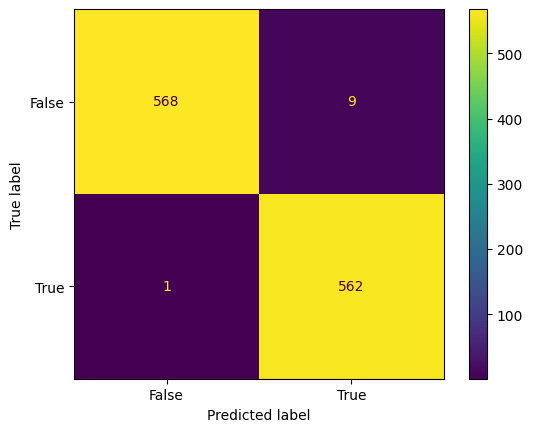

In [229]:
cm_display.plot()
plt.show()

### Extra exploration regarding why customers churn
依据上文的相关图，我们得出以下的结论：

· 语音留言，总的国际通话时间，以及是否有语音留言计划，与客户是否会流失有着负相关性。

· 日通话时间，日支出，拨打客服次数，以及是否有国际通话计划，与客户是否流失有着正相关性。

<AxesSubplot:>

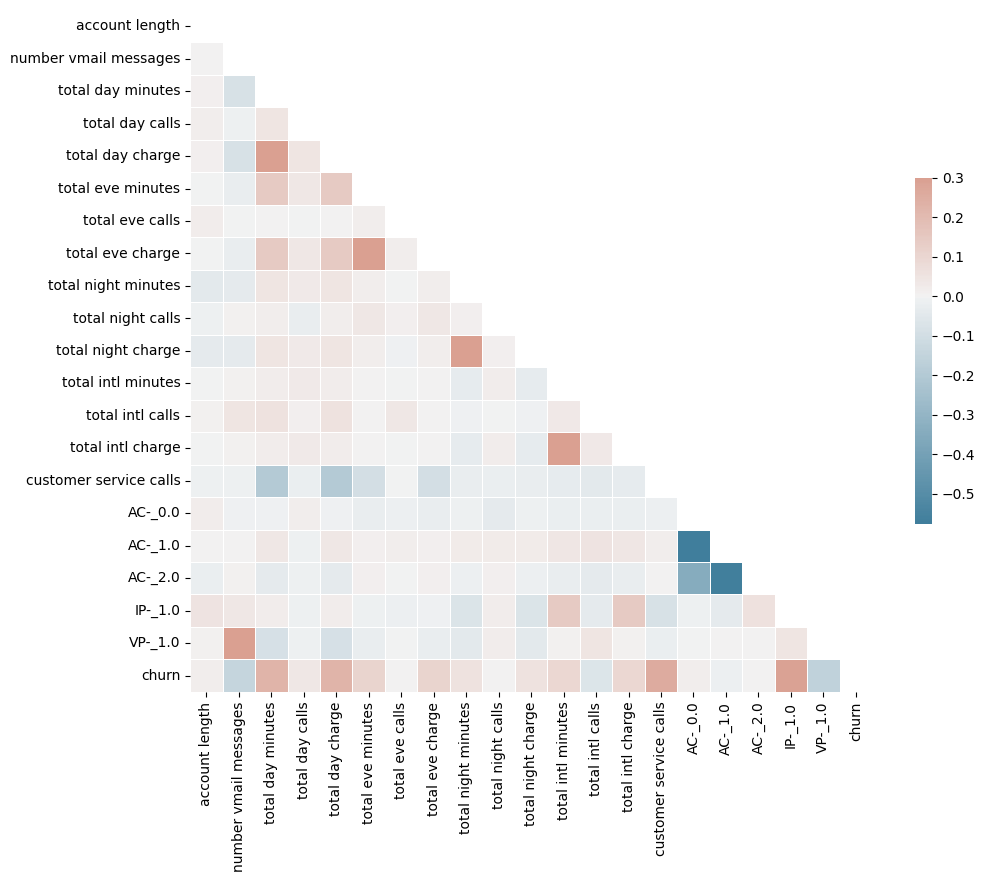

In [242]:
# Generate a mask for the upper triangle

corr = df_final.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### 我们也可以根据不同类别的客户（流失或者非流失），比较各个变量的均值，从而得出哪些因素会影响客户流失的结论。

In [237]:
xy_check_churn=pd.concat([x_norm_full,y_full],axis=1)
xy_check_churn=xy_check_churn.groupby('churn').mean()
xy_check_churn

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,AC-_0.0,AC-_1.0,AC-_2.0,IP-_1.0,VP-_1.0
churn,,,,,,,,,,,,,,,,,,,,
0.0,0.469738,0.152581,0.476653,0.515609,0.476653,0.488393,0.498063,0.488066,0.495761,0.479894,0.493873,0.503339,0.226649,0.503339,0.161092,0.251228,0.497895,0.250877,0.065263,0.295439
1.0,0.476437,0.086775,0.602678,0.529403,0.602678,0.544744,0.498565,0.543352,0.523561,0.480901,0.518792,0.536607,0.209772,0.536607,0.253567,0.264912,0.480351,0.254737,0.284211,0.160000


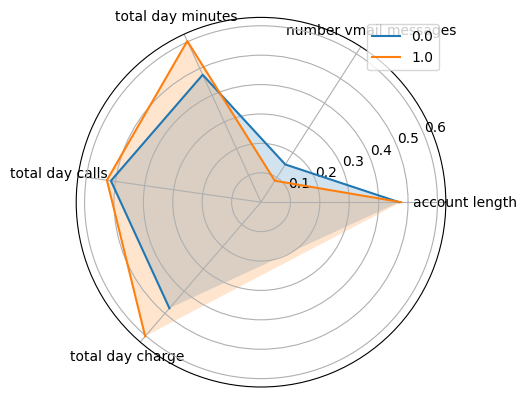

In [250]:
df_plot1 = xy_check_churn[['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge']]
ax = plt.axes(polar=True)
for col in df_plot1.index:
    ax.plot(df_plot1.T[col], label=col)
    ax.fill(df_plot1.T[col], alpha=0.2)
plt.legend()
plt.show()

从这个雷达图中，可以看的出，每日通话时长和通话费用直接影响客户流失。

从此我们可以看的出，可能是因为通话费用比较高，客户对此不满意，导致不在使用。

语音留言多的客户更不容易停止使用服务，这也从另一个角度说明语音留言相对于通话比较便宜，更能留住客户。

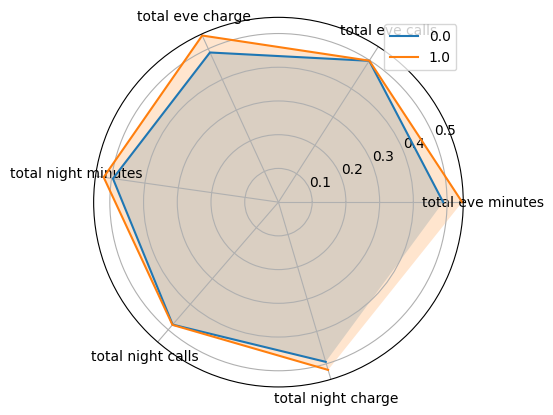

In [259]:
df_plot2 = xy_check_churn[['total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge']]
ax = plt.axes(polar=True)
for col in df_plot2.index:
    ax.plot(df_plot2.T[col], label=col)
    ax.fill(df_plot2.T[col], alpha=0.2)
plt.legend()
plt.show()

这几个变量对客户是否流失的参考价值不是很大。

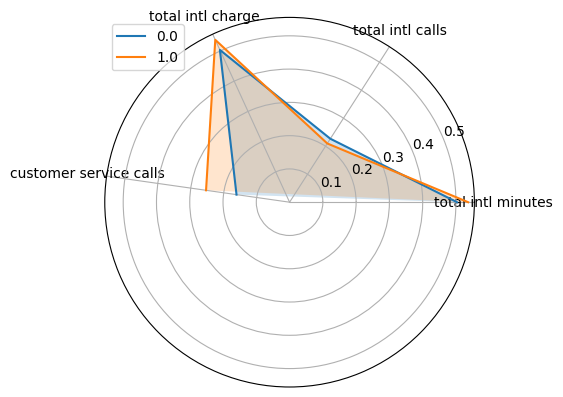

In [257]:
df_plot3 = xy_check_churn[['total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls']]
ax = plt.axes(polar=True)
for col in df_plot3.index:
    ax.plot(df_plot3.T[col], label=col)
    ax.fill(df_plot3.T[col], alpha=0.2)
plt.legend()
plt.show()

顾客是否打客服也与客户流失有相关性。可以理解，因为当一个客户对服务的满意度不高的时候，大概率会找客服。

如果解决了问题，可能不会导致客户流失，但是如果没有解决客户打电话的问题，最终会降低客户忠诚度，从而导致客户流失。

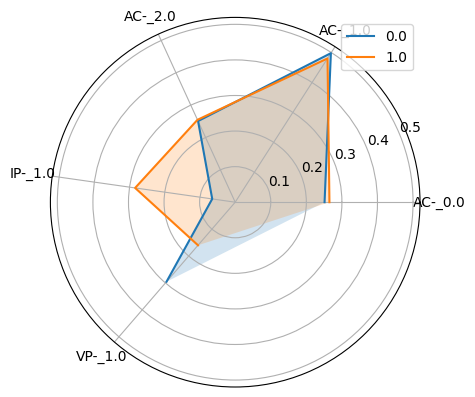

In [258]:
df_plot4 = xy_check_churn[['AC-_0.0', 'AC-_1.0', 'AC-_2.0', 'IP-_1.0', 'VP-_1.0']]
ax = plt.axes(polar=True)
for col in df_plot4.index:
    ax.plot(df_plot4.T[col], label=col)
    ax.fill(df_plot4.T[col], alpha=0.2)
plt.legend()
plt.show()

是否有国际套餐对客户是否流失有着非常大的决定性。有国际套餐的客户，更容易流失。原因可能是国际套餐比较贵，或者套餐内容不够吸引人。

是否有语音留言套餐与客户是否流失有着比较强的关联。开了语音服务的客户，更不容易流失。原因可能是语音服务便宜，或者客户群体中，有很大一部分客户本身就是倾向使用语音留言的群体，比如年轻人。

对于开了国际套餐的客户，我认为我们可以相对的进行一些促销。比如连续开6个月，送1个月的国际套餐；或者开国际电话套餐，送国际/国内短信套餐/流量套餐等；还有一种方式是可以向这部分客户群体介绍语音留言套餐，这样就可以将这部分容易失去忠诚度的客户转为不容易失去的客户群体。

对于开了语音留言套餐的客户，保持他们的忠诚度是关键。我们可以通过更多的福利，去留住这一部分客户。